# To what extent do socioeconomic and behavioural factors have on overall mathematics grades and how effective is linear regression at modelling a students performance in portugese maths examinations? 

## Initial Data Exploration and Visualization: 
I first started off by trying to run a simple analysis on the data set examining simple phenomena to visualise the dataset. I initially began by examining the direct effect study time has on the final grade achieved more specifically looking at the correlation between these two variables and plotting a straight line of best fit to model the data. 

Correlation : 0.127


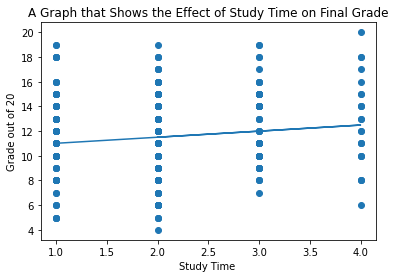

In [92]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statistics import mean

csv_import = pd.read_csv("student-mat.csv")
study_time = np.array(csv_import['studytime'])
final_grade = np.array(csv_import['G3'])
g3 = []
study_hrs = []
for i in range(0,len(final_grade)):
    if final_grade[i] != 0:
        g3.append(final_grade[i])
        study_hrs.append(study_time[i])
g3 = np.array(g3,dtype=np.float64)
study_hrs = np.array(study_hrs,dtype=np.float64)
r = np.corrcoef(study_hrs,g3)
print("Correlation :",format(r[0][1],".3f"))

m, c = np.polyfit(study_hrs,g3,1)
#reg_line = [(m*study_hrs)+c for i in study_hrs]
plt.scatter(study_hrs,g3)
plt.xlabel("Study Time ")
plt.ylabel("Grade out of 20")
plt.title("A Graph that Shows the Effect of Study Time on Final Grade")
plt.plot(study_hrs,m*study_hrs+c)

### Analysis and Further Explanations
Based on the preliminary results of this data exploration, I discovered that study time (with a correlation of 0.127) did not have as high an effect on final grade as I had expected. I hence decided to explore doing multivariate analysis to examine the data and gain a deeper understanding of the factors involved and how they affect academic performance. 


### Analytic Techniques and Model Validation:
I used approximately 90% of the data for training the model and the remaining 10% was used to test how effective the model was at making predictions (90-10 train test split). This was done by taking the first 350 rows of data and storing them into a new CSV file. I made this decision because the maths data set is rather small with around 400 rows and hence I thought that more data should be used in order to perform an accurate linear regression. 

I analysed a total of 8 columns to determine the effect of several given variables on performance in final exams. 

### This Included:
1. Study Time

2. Absences 

3. Father education level

4. Mother education level

5. Time spent socialising

6. Time taken to commute to school

7. Workday alcohol consumption

8. Weekend alcohol consumption

These parameters were passed into the linear regression model and the y-intercept as well as the individual contributions of each factor were found.      


In [94]:
#absences, MEDU, FEDU, famrel, study_time,goout (for maths grade)
#investigate the importance of study time, stable family as well as hours spent in class are on overall

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statistics import mean
from sklearn import linear_model

csv_import = pd.read_csv("filter_mat.csv")
#I created my own data set with approximately 350 rows to leave some data for testing purposes.
#I decided to incorporate a large amount of 


X = csv_import[['studytime','absences','Fedu','Medu','goout','traveltime','Dalc','Walc']]
Y = csv_import[['G3']]

reg = linear_model.LinearRegression()
reg.fit(X,Y)
reg.coef_ 


array([[ 0.32862174,  0.01347622,  0.04301862,  0.78877677, -0.89785452,
        -0.5608061 , -0.28374788,  0.36045089]])

In [95]:
reg.intercept_

array([10.57792247])

### Code Explanation
The cells above are used to run a linear regression model on the 8 categories listed as above. This was done through using python pandas and statistics packages.The array of factors shows the effect of each category on student attainment and category coefficients are listed in the order as stated previously in the numbered list above.


## Insights and Analysis:

The data retrieved by the model presents some rather interesting findings. The positive correlation coefficient of 0.329 (3 S.F.) between studying and final grades indicates that if students increase their study time by 1 effort grade (which is ranked from 1-5) their overall score is expected to increase by a total of 0.329. Hence, studying harder can result in grades improving which is as expected. Additionally, it was ironic that the number of absences generally could contribute positively to higher grades achieved in the final exam. It is possible that this may have been one of the limitations of the model and that there may not have been enough data to validate whether absences really could impact scores so greatly. 

It appears that parental education does have an effect on a student’s overall performance too. However, it seems that the mother’s education level has a far greater contribution than the father’s education level on a student’s attainment. The factor coefficient between mother’s education level and attainment is 0.789 while for the father’s it is 0.0430 (3 S.F.). The case for parental education and student aptitude is clear in that educated parents could have higher ambitions and expectations for children to succeed (amongst a variety of other factors). However, I found it quite strange that the mother’s education level could influence the child’s performance in a far greater manner than the father’s education and in a future project will likely investigate this further. 

Based on the next sets of data it seems travel time to school/university was a factor that affected the students performance in school/university greatly. Longer commute times are not ideal and results in grades dropping. This could be due to the fact that longer commutes could be more tiring and hence the student may not be as refreshed during class amongst a variety of other reasons. Time spent socialising was the factor that affected performance most significantly with a coefficient of -0.898. It appears that spending more time socialising is bad as it could mean students will have less time to study due to maintaining such large social networks or also because they could be more likely to be distracted by social media.  

Meanwhile, for alcohol consumption the trends are interesting. It seems that drinking alcohol during workdays will negatively affect performance (with a correlation coefficient of -0.284). This could be as expected because drinking may affect REM sleep which is necessary for a student's performance and aptitude. However, what was ironic is that drinking during weekends actually had a positive correlation on performance being having a coefficient of 0.360. While I can speculate that drinking alcohol during weekends can be good to help students relax, the findings still are surprising and should be investigated further or using a different model.   


## Humorous Insights and Advice for Uni-Students:

#### DISCLAIMER: All of this should be taken with a pinch of salt and has not been researched thoroughly enough to affirm. It is meant as humour and for a fun creative interpretation of the data. It ALSO IS NOT A THOROUGH ANALYSIS OF THE DATASET which you should check  the previous section for

The model student (the one who achieves the highest grades) is one who is hard working, skips classes and has educated parents. They also have a relatively short commute time to campus, they can drink on the weekends but not on weekdays and do not spend much time socialising. Based on my experience on Imperial this trend can be abstracted to England :).

#### To Do Well in University You Should: 
1. Get wasted on weekends (I mean that’s what they are for) 
2. Lock yourself in your room and become a recluse 
3. Devote your entire life and soul to studying
4. Live right next to university
5. Skip classes it’s ok because you can watch them on 1-2x speed on panopto. 


In [96]:
##this section of code is used for testing
#the math csv folder 
import_2 = pd.read_csv("student-mat.csv")
study_hrs2 = np.array(import_2['studytime'])
abs_stats2 = np.array(import_2['absences'])
fed = np.array(import_2['Fedu'])
med = np.array(import_2['Medu'])
go_out = np.array(import_2['goout'])
travel_t = np.array(import_2['traveltime'])
daily_alc = np.array(import_2['Dalc'])
wkly_alc = np.array(import_2['Walc'])
G3 = np.array(import_2['G3'])

difference = 0
max_arr = []
for i in range(350,len(G3)):
    sum_val = study_hrs2[i]*0.32862174+abs_stats2[i]*0.01347622+fed[i]*0.04301862+0.78877677*med[i]
    sum_val += -0.89785452*go_out[i]+travel_t[i]*-0.5608061+-0.28374788*daily_alc[i]+0.36045089*wkly_alc[i]
    difference += abs(10.57792247+sum_val-G3[i])
    

total = len(import_2)-351 
mean = round(difference/total,2)
print("The mean difference is: ",mean)


The mean difference is:  3.12


## Model Evaluation:
Overall, it appears that linear regression with linear weights and biases was not a fantastic tool for analysing the students' performance, with the model being on average off  by a factor of 3.12 /20 each measurement. While it is possible that other factors could have been included to make the data prediction better it is likely that linear regression is not sophisticated enough in modelling to accurately capture how effectively a student could perform. It is likely that in order to obtain a more accurate measurement machine learning algorithms should be used instead as they can have more complicated activation functions and can also apply complex features such as dropout and weight decay.  
